# WEEK 1: Data Exploration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Read datasets
outflow = pd.read_parquet("ucsd-outflows.pqt")
inflow = pd.read_parquet("ucsd-inflows.pqt")

In [3]:
# Statistical EDA
# Observe unique transaction category and their counts
print(outflow['category'].value_counts())
print(inflow['category'].value_counts())

print(outflow['amount'].describe())
print(inflow['amount'].describe())

print(outflow.groupby('category')['memo'].count())
print(inflow.groupby('category')['memo'].count())

category
GENERAL_MERCHANDISE    524063
FOOD_AND_BEVERAGES     481994
EXTERNAL_TRANSFER      320998
GROCERIES              219331
AUTOMOTIVE             208579
ATM_CASH               117651
UNCATEGORIZED          117409
LOAN                    90945
ENTERTAINMENT           80885
ESSENTIAL_SERVICES      77137
CREDIT_CARD_PAYMENT     75506
SELF_TRANSFER           73281
TRAVEL                  59647
HEALTHCARE_MEDICAL      40842
ACCOUNT_FEES            37511
INSURANCE               30244
PETS                     9266
HOME_IMPROVEMENT         8600
GIFTS_DONATIONS          4719
EDUCATION                4499
OVERDRAFT                3386
TAX                      3186
RENT                     3147
BNPL                     1543
MORTGAGE                 1119
PAYCHECK                 1040
CHILD_DEPENDENTS          936
BILLS_UTILITIES            23
AUTO_LOAN                   1
Name: count, dtype: int64
category
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT               

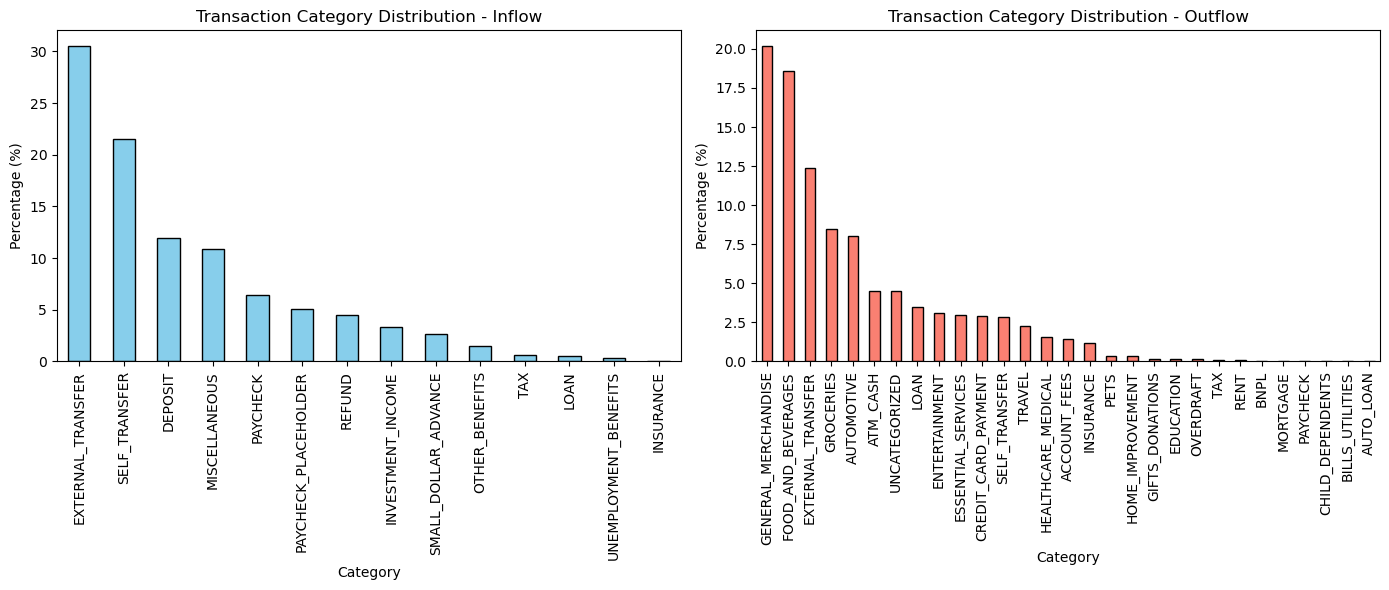

In [4]:
# EDA: Distribution of categories in both datasets
inflow_category_distribution = inflow['category'].value_counts(normalize=True) * 100
outflow_category_distribution = outflow['category'].value_counts(normalize=True) * 100

# Set up the figure
plt.figure(figsize=(14, 6))

# Plot inflow category distribution
plt.subplot(1, 2, 1)
inflow_category_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Transaction Category Distribution - Inflow')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)

# Plot outflow category distribution
plt.subplot(1, 2, 2)
outflow_category_distribution.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Transaction Category Distribution - Outflow')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

In [5]:
# Find most common merchants per category for outflow data

outflows_top_merchants = outflow.groupby('category')['memo'].agg(lambda x: x.mode())
outflows_top_merchants = outflows_top_merchants.reset_index()
print(outflows_top_merchants[outflows_top_merchants['category'] != outflows_top_merchants['memo']])

# Find most common merchants per category for inflow data

inflows_top_merchants = inflow.groupby('category')['memo'].agg(lambda x: x.mode())
inflows_top_merchants = inflows_top_merchants.reset_index()
print(inflows_top_merchants)

               category                                memo
8             EDUCATION             Teacherspayteachers.com
12   FOOD_AND_BEVERAGES                          McDonald's
13  GENERAL_MERCHANDISE                              Amazon
15            GROCERIES                             Walmart
20             MORTGAGE  HUNTINGTON MORTG ONLINE PMT XXXXXX
21            OVERDRAFT                  Overdraft Item Fee
23                 PETS                            PetSmart
24                 RENT           SOUTHERN INVESTO WEB PMTS
27               TRAVEL                                Uber
                 category                   memo
0                 DEPOSIT                DEPOSIT
1       EXTERNAL_TRANSFER      EXTERNAL_TRANSFER
2               INSURANCE              INSURANCE
3       INVESTMENT_INCOME      INVESTMENT_INCOME
4                    LOAN                   LOAN
5           MISCELLANEOUS          MISCELLANEOUS
6          OTHER_BENEFITS         OTHER_BENEFITS
7       